# Plot The Fraction For a Presentation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

In [12]:
import sys
sys.path.append('/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/')

from file_loc import FileLocs

In [14]:
fl = FileLocs()
file_base = fl.data_loc+'/tmp/{xlabel}_{name}.npy'
file_base_tng = fl.data_loc+'tng/'+'/tmp/{xlabel}_{name}.npy'

In [15]:
mycolors2 = ['royalblue','darkorange','darkgreen']
mycolors = ['tab:%s'%ci for ci in ['blue','orange','green']]


In [55]:
label1 = ['Orbital', 'Infall', 'Interlopers']
label2 = ['Orbital-Infall', 'Orbital-Interlopers', 'Infall-Interlopers']
xlabels = {'cross_time':r't$_{cross}$ [Gyr]','smass':r'Log($M_\star/M_{\odot}$)','radii':r'R/R$_{200}$'}

def get_percentile(y):
    a1,a2,a3 = np.nanpercentile(y,[25,50,75])
    ylow,yhig = a1-3.*(a3-a1)/2.,a3+3.*(a3-a1)/2.
    return ylow,yhig

def plot_fraction_pannel(xlabel, name, xscale=False, save=None, tng=False):
    x = np.loadtxt(file_base.format(xlabel=xlabel, name=name)).T
    if tng:
        x_tng = np.loadtxt(file_base_tng.format(xlabel=xlabel, name=name)).T
    
    if xlabel=='cross_time':
        xscale = True
        #x[0] = 10**x[0]#/1e9
        
    plt.clf()
    fig = plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    
    count = np.zeros_like(x[0])
    for i in range(3):
        ii = 3*i + 1
        p = plt.errorbar(x[0], x[ii], yerr=np.vstack([x[ii+1],x[ii+2]]), ls='-', color=mycolors[i], fmt='o')
        plot_curve(x[0], x[ii], x[ii+1], x[ii+2], ax = plt, color=mycolors[i], label=label1[i])
        if tng:
            plot_curve(x_tng[0], x_tng[ii], x_tng[ii+1], x_tng[ii+2], ax = plt, color=mycolors2[i], marker='x')
            plt.errorbar(x_tng[0], x_tng[ii], yerr=np.vstack([x_tng[ii+1],x_tng[ii+2]]), ls='--', fmt='x',color=mycolors2[i])
    
    if xscale:
        plt.xscale('log')
    plt.legend(fontsize=12)
    plt.xlabel(xlabels[xlabel],fontsize=18)
    #plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
    plt.title('%s Fraction'%name.capitalize(),fontsize=16)
    
    plt.subplot(1, 2, 2)
    for i in range(3):
        ii = (3*i + 1)+9
        #x[ii] = np.where(x[ii]<-.75,np.nan,x[ii])
        p = plt.errorbar(x[0], x[ii], yerr=np.vstack([x[ii+1],x[ii+2]]), color=mycolors[i], ls='-', fmt='o')
        plot_curve(x[0], x[ii], x[ii+1], x[ii+2], ax = plt, color=mycolors[i], label=label2[i])
        if tng:
            plot_curve(x_tng[0], x_tng[ii], x_tng[ii+1], x_tng[ii+2], ax = plt, color=mycolors2[i], marker='x')
            plt.errorbar(x_tng[0], x_tng[ii], yerr=np.vstack([x_tng[ii+1],x_tng[ii+2]]), ls='--', fmt='x',color=mycolors2[i])
    
    plt.axhline(0.,ls='--',lw=4,color='lightgray')
    plt.xlabel(xlabels[xlabel],fontsize=18)
    plt.legend()
    plt.title('%s Fraction Excess'%name.capitalize(),fontsize=16)
    if xscale:
        plt.xscale('log')
    del x
    
    if save is not None:
        plt.savefig(save, transparent=False, facecolor='w', dpi=150)
        plt.clf()
    return plt

In [47]:
def plot_curve(x,y,ylow,yhig,ax=None,color=None,**args):
    if ax is None: ax = plt.axes()
    p = ax.fill_between(x,y-ylow,y+yhig,color=color,alpha=0.3)
    ax.scatter(x,y,color=color,**args)
    

In [48]:
labels_mpr = ['sf', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

labels = labels_mpr+labels_bpt

In [49]:
# import seaborn as sns
# sns.set_style('whitegrid')
# sns.set_context('notebook')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

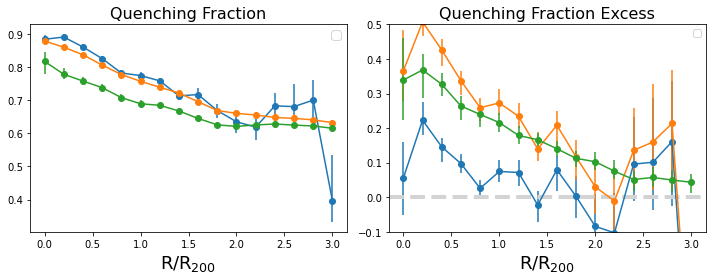

In [50]:
plot_fraction_pannel('radii','quenching')
plt.ylim(-0.1,0.5)
plt.tight_layout()
plt.savefig('../plots/quenching_fraction_radii.png', transparent=False, facecolor='w', dpi=150)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

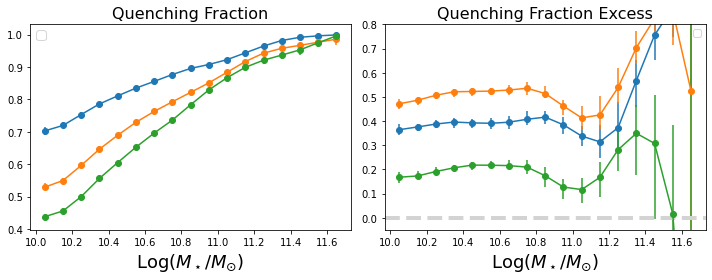

In [51]:
plot_fraction_pannel('smass','quenching')
plt.ylim(-0.05,0.80)
plt.tight_layout()
plt.savefig('../plots/quenching_fraction_smass.png', transparent=False, facecolor='w', dpi=150)

In [52]:
# plot_fraction_pannel('cross_time','quenching')
# plt.ylim(-0.05,0.80)
# plt.tight_layout()
# plt.savefig('../plots/quenching_fraction_cross-time.png', transparent=False, facecolor='w', dpi=150)

<Figure size 432x288 with 0 Axes>

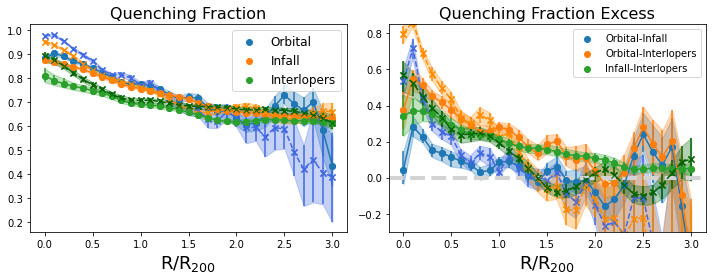

In [60]:
plot_fraction_pannel('radii','quenching',tng=True)
plt.ylim(-0.3,0.85)
plt.tight_layout()
plt.savefig('../plots/quenching_fraction_radii_w_tng.png', transparent=False, facecolor='w', dpi=150)

<Figure size 432x288 with 0 Axes>

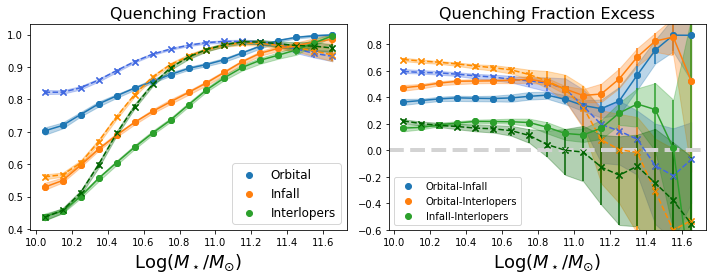

In [59]:
plot_fraction_pannel('smass','quenching',tng=True)
plt.ylim(-0.6,0.95)
plt.tight_layout()
plt.savefig('../plots/quenching_fraction_smass_w_tng.png', transparent=False, facecolor='w', dpi=150)

<module 'matplotlib.pyplot' from '/usr/local/anaconda/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

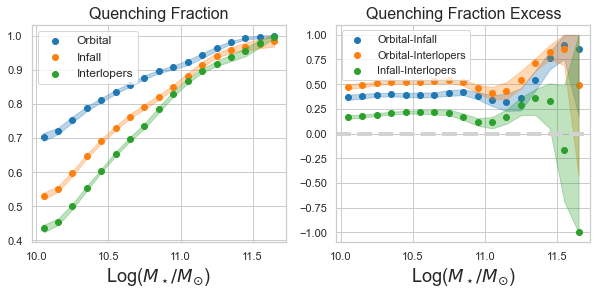

In [359]:
plot_fraction_pannel('smass','quenching')

count: [0.85218 0.85423 0.84037 0.82809 0.81579 0.86328 0.94458 0.97257 0.97489
 0.96373 0.90828 0.9502 ]


<Figure size 432x288 with 0 Axes>

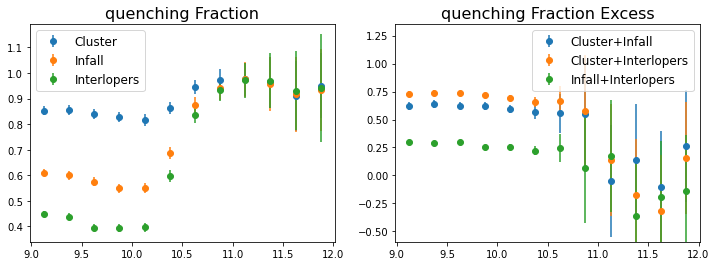

In [8]:
plot_fraction_pannel('smass','quenching')

count: [0.96417 0.94303 0.90364 0.87736 0.84744 0.81263 0.79181 0.77908 0.78534
 0.78113]


<Figure size 432x288 with 0 Axes>

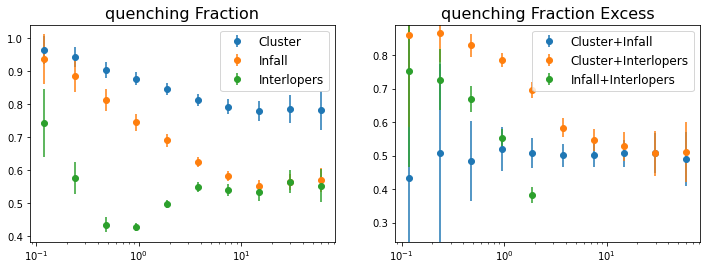

In [9]:
plot_fraction_pannel('free_fall','quenching')

count: [0.03583 0.05697 0.09636 0.12264 0.15256 0.18737 0.20819 0.22092 0.21466
 0.21887]


<Figure size 432x288 with 0 Axes>

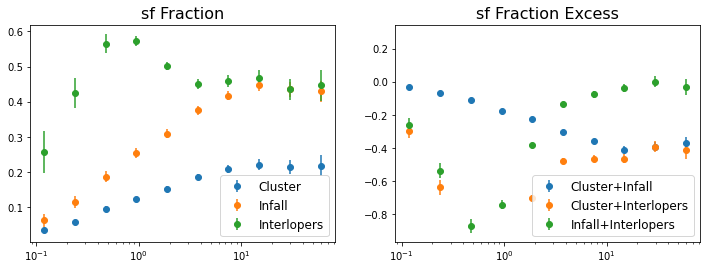

In [10]:
plot_fraction_pannel('free_fall','sf')

In [11]:
# plot_fraction_pannel('free_fall','merger')

In [12]:
labels_mpr = ['sf', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']


count: [0.85218 0.85423 0.84037 0.82809 0.81579 0.86328 0.94458 0.97257 0.97489
 0.96373 0.90828 0.9502 ]


<Figure size 432x288 with 0 Axes>

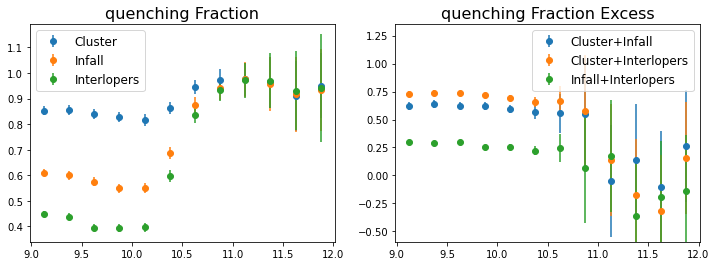

In [13]:
plot_fraction_pannel('smass','quenching')

In [14]:
plot_fraction_pannel('smass','elliptical')

OSError: ../data/tmp/tng/elliptical_smass.npy not found.

In [15]:
plot_fraction_pannel('smass','spiral')

OSError: ../data/tmp/tng/spiral_smass.npy not found.

count: [0.73194 0.73516 0.70279 0.69088 0.66512 0.67004 0.67967 0.63874 0.7007
 0.62209]


<Figure size 432x288 with 0 Axes>

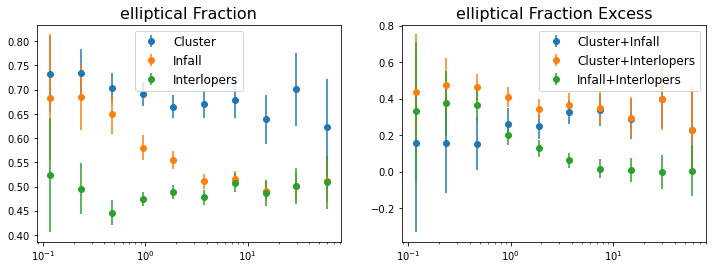

In [152]:
plot_fraction_pannel('free_fall','elliptical')

count: [0.26806 0.26484 0.29721 0.30912 0.33488 0.32996 0.32033 0.36126 0.2993
 0.37791]


<Figure size 432x288 with 0 Axes>

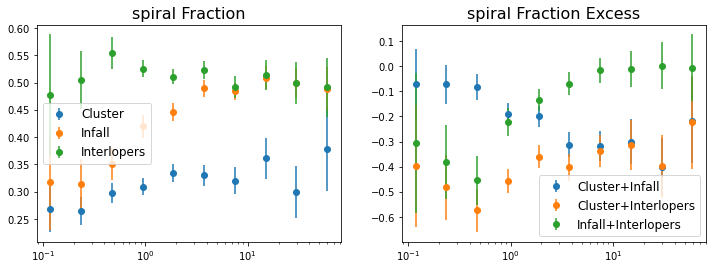

In [153]:
plot_fraction_pannel('free_fall','spiral')

count: [0.7882  0.79076 0.77654 0.7586  0.75364 0.75864 0.73596 0.7219  0.73099
 0.7061 ]


<Figure size 432x288 with 0 Axes>

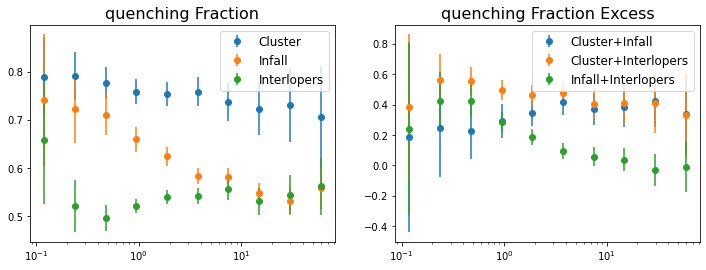

In [154]:
plot_fraction_pannel('free_fall','quenching')

count: [0.2118  0.20924 0.22346 0.2414  0.24636 0.24136 0.26404 0.2781  0.26901
 0.2939 ]


<Figure size 432x288 with 0 Axes>

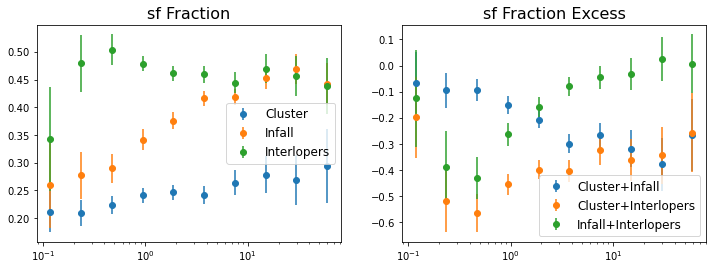

In [129]:
plot_fraction_pannel('free_fall','sf')

count: [0.177 0.177 0.177 0.177 0.177 0.177 0.177 0.177 0.177 0.177 0.177 0.177]


<Figure size 432x288 with 0 Axes>

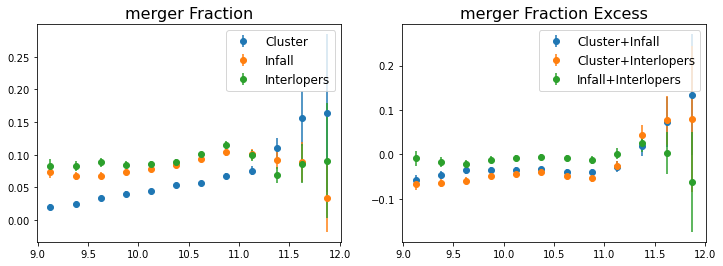

In [105]:
plot_fraction_pannel('smass','merger')

count: [0.30503 0.30503 0.30503 0.30503 0.30503 0.30503 0.30503 0.30503 0.30503
 0.30503 0.30503 0.30503]


<Figure size 432x288 with 0 Axes>

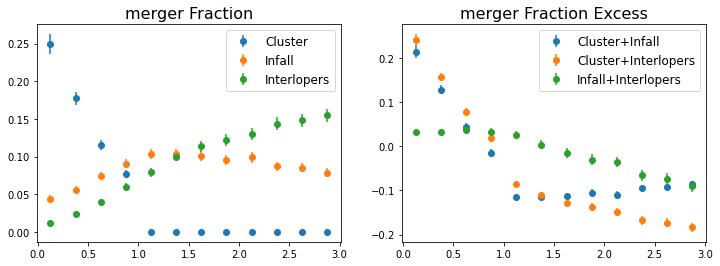

In [106]:
plot_fraction_pannel('radii','merger')

count: [0.61072 0.61072 0.61072 0.61072 0.61072 0.61072 0.61072 0.61072 0.61072
 0.61072 0.61072 0.61072]


<Figure size 432x288 with 0 Axes>

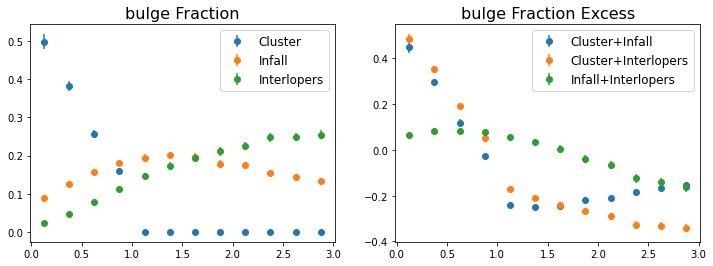

In [108]:
plot_fraction_pannel('radii','bulge')

In [36]:
from file_loc import FileLocs
fl = FileLocs()
galaxy_file = fl.gal_fname1
gal0 = at.read(galaxy_file)
mask = np.abs(gal0['vlosn']) <= 3.
gal = gal0[mask].copy()

In [37]:
sp   = np.where(gal['TType'] > 0, 1, 0).astype(int)
sf   = np.array(gal['SF']).astype(int)
qf   = (1-sf).astype(int)

Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

In [108]:
from utils import compute_fraction1, quenching_fraction_excess, save_output_matrix, make_bins, check_non_valid_number
rn = np.array(gal['Rn'])
rbins = np.arange(0.,3.25,0.25)
rkeys, rmed  = make_bins(rn, rbins)

t_infall = np.array(gal['t_infall'])/1e9
tbins = np.logspace(8.2,11.2,11)/1e9/2.   #infall time
tkeys, tmed = make_bins(t_infall, tbins)

In [155]:
p = sp
p2= qf
Pn2 = np.where(rn<2.,0.,Pn)

In [156]:
frac_o = np.array([compute_fraction1(p[idx]*(Po[idx]+Pi[idx]),p2[idx]) for idx in rkeys]).T
frac_i = np.array([compute_fraction1(p[idx]*Pi[idx],p2[idx]) for idx in rkeys]).T
frac_n = np.array([compute_fraction1(p[idx]*Pn2[idx],p2[idx]) for idx in rkeys]).T
is_nan = np.isnan(frac_n[0])
frac_n[0][is_nan] = np.nanmedian(frac_n[0])
frac_n[1][is_nan] = np.nanmedian(frac_n[1])

qfrac_oi = quenching_fraction_excess(frac_i, frac_o)
qfrac_on = quenching_fraction_excess(frac_n, frac_o)
qfrac_in = quenching_fraction_excess(frac_n, frac_i)

# save
save_output_matrix([rmed, frac_o, frac_i, frac_n, qfrac_oi, qfrac_on, qfrac_in], '../data/tmp/spiral_quenching_radii.npy')


In [157]:
frac_o = np.array([compute_fraction1(p[idx]*(Po[idx]+Pi[idx]),p2[idx]) for idx in tkeys]).T
frac_i = np.array([compute_fraction1(p[idx]*Pi[idx],p2[idx]) for idx in tkeys]).T
frac_n = np.array([compute_fraction1(p[idx]*Pn2[idx],p2[idx]) for idx in tkeys]).T

is_nan = np.isnan(frac_n[0])
frac_n[0][is_nan] = np.nanmedian(frac_n[0])
frac_n[1][is_nan] = np.nanmedian(frac_n[1])

qfrac_oi = quenching_fraction_excess(frac_i, frac_o)
qfrac_on = quenching_fraction_excess(frac_n, frac_o)
qfrac_in = quenching_fraction_excess(frac_n, frac_i)

# save
save_output_matrix([tmed, frac_o, frac_i, frac_n, qfrac_oi, qfrac_on, qfrac_in], '../data/tmp/spiral_quenching_free_fall.npy')


In [158]:
# from scipy import stats
# cat = at.read('../data/groupCatalog_Yang_deCarvalho2017_frac.csv')
# frac_n = [2.75,np.median(cat['fn_spiral_quenching']),stats.median_absolute_deviation(cat['fn_spiral_quenching'],scale=1/1.4826)]

count: [0.43329 0.43368 0.38582 0.35409 0.33697 0.31624 0.31018 0.28747 0.24986
 0.22468 0.22485 0.24052]


Text(0.5, 0, '$R/R_{200}$')

<Figure size 432x288 with 0 Axes>

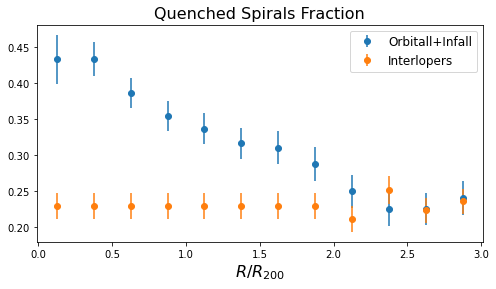

In [159]:
prop = 'spiral_quenching'
method = 'radii'
x = np.loadtxt(file_base.format(type=prop, prop=method)).T

plt.clf()
fig = plt.figure(figsize=(8,4))
plt.subplot(1, 1, 1)

count = np.zeros_like(x[0])
for i in range(1):
    ii = 2*i + 1
    plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Orbitall+Infall', fmt='o')

ii = 2*2+1
plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Interlopers', fmt='o')
# plt.errorbar(frac_n[0], frac_n[1], yerr=frac_n[2], label='Interlopers', fmt='o')
    #count = x[ii][0]
print('count:',x[1])

plt.legend(fontsize=12)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
plt.title('Quenched Spirals Fraction',fontsize=16)
plt.xlabel(r'$R/R_{200}$', fontsize=16)
# plt.subplot(1, 2, 2)

# y = np.empty((0))
# for i in range(3):
#     ii = (2*i + 1)+6
#     plt.errorbar(x[0], x[ii], yerr=0.5*x[ii+1], label=label2[i], fmt='o')
#     y = np.hstack([y,x[ii]])

# ymin,ymax = get_percentile(y)
# plt.legend(fontsize=12)
# plt.ylim(ymin,ymax)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
# plt.title('%s Fraction Excess'%prop,fontsize=16)


count: [0.39514 0.39128 0.36923 0.38127 0.3545  0.32291 0.31442 0.27455 0.25911
 0.26868]


Text(0.5, 0, '$t_{cross}$  [Gry]')

<Figure size 432x288 with 0 Axes>

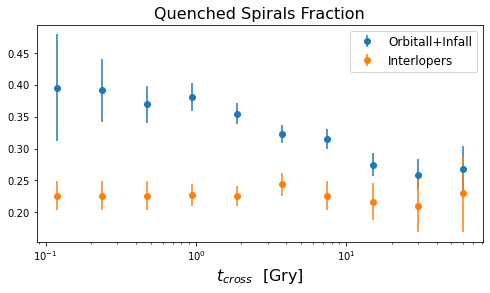

In [160]:
prop = 'spiral_quenching'
method = 'free_fall'
x = np.loadtxt(file_base.format(type=prop, prop=method)).T

plt.clf()
fig = plt.figure(figsize=(8,4))
plt.subplot(1, 1, 1)

count = np.zeros_like(x[0])
for i in range(1):
    ii = 2*i + 1
    plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Orbitall+Infall', fmt='o')

ii = 2*2+1
plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Interlopers', fmt='o')
# plt.errorbar(frac_n[0], frac_n[1], yerr=frac_n[2], label='Interlopers', fmt='o')
    #count = x[ii][0]
print('count:',x[1])
plt.xscale('log')
plt.legend(fontsize=12)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
plt.title('Quenched Spirals Fraction',fontsize=16)
plt.xlabel(r'$t_{cross}$  [Gry]', fontsize=16)
# plt.subplot(1, 2, 2)

# y = np.empty((0))
# for i in range(3):
#     ii = (2*i + 1)+6
#     plt.errorbar(x[0], x[ii], yerr=0.5*x[ii+1], label=label2[i], fmt='o')
#     y = np.hstack([y,x[ii]])

# ymin,ymax = get_percentile(y)
# plt.legend(fontsize=12)
# plt.ylim(ymin,ymax)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
# plt.title('%s Fraction Excess'%prop,fontsize=16)


In [165]:
Ps0   = check_non_valid_number(gal['PS0'])
# Ps0[np.isnan(Ps0)] = 0.

p = Ps0
p2= qf
Pn2 = np.where(rn<2.,0.,Pn)

In [166]:
frac_o = np.array([compute_fraction1(p[idx]*(Po[idx]+Pi[idx]),p2[idx]) for idx in rkeys]).T
frac_i = np.array([compute_fraction1(p[idx]*Pi[idx],p2[idx]) for idx in rkeys]).T
frac_n = np.array([compute_fraction1(p[idx]*Pn2[idx],p2[idx]) for idx in rkeys]).T

is_nan = np.isnan(frac_n[0])
frac_n[0][is_nan] = np.nanmedian(frac_n[0])
frac_n[1][is_nan] = np.nanmedian(frac_n[1])

qfrac_oi = quenching_fraction_excess(frac_i, frac_o)
qfrac_on = quenching_fraction_excess(frac_n, frac_o)
qfrac_in = quenching_fraction_excess(frac_n, frac_i)

# save
save_output_matrix([rmed, frac_o, frac_i, frac_n, qfrac_oi, qfrac_on, qfrac_in], '../data/tmp/bulge_quenching_radii.npy')


In [167]:
frac_o = np.array([compute_fraction1(p[idx]*(Po[idx]+Pi[idx]),p2[idx]) for idx in tkeys]).T
frac_i = np.array([compute_fraction1(p[idx]*Pi[idx],p2[idx]) for idx in tkeys]).T
frac_n = np.array([compute_fraction1(p[idx]*Pn2[idx],p2[idx]) for idx in tkeys]).T

is_nan = np.isnan(frac_n[0])
frac_n[0][is_nan] = np.nanmedian(frac_n[0])
frac_n[1][is_nan] = np.nanmedian(frac_n[1])

qfrac_oi = quenching_fraction_excess(frac_i, frac_o)
qfrac_on = quenching_fraction_excess(frac_n, frac_o)
qfrac_in = quenching_fraction_excess(frac_n, frac_i)

# save
save_output_matrix([tmed, frac_o, frac_i, frac_n, qfrac_oi, qfrac_on, qfrac_in], '../data/tmp/bulge_quenching_free_fall.npy')


In [168]:
# from scipy import stats
# cat = at.read('../data/groupCatalog_Yang_deCarvalho2017_frac.csv')
# frac_n = [2.75,np.median(cat['fn_spiral_quenching']),stats.median_absolute_deviation(cat['fn_spiral_quenching'],scale=1/1.4826)]

count: [0.79206 0.7397  0.66798 0.60802 0.57034 0.54774 0.53464 0.51257 0.48878
 0.46039 0.43874 0.4485 ]


Text(0.5, 0, '$R/R_{200}$')

<Figure size 432x288 with 0 Axes>

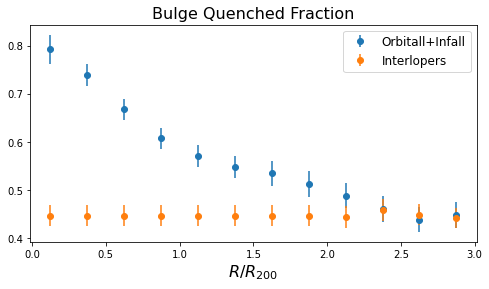

In [169]:
prop = 'bulge_quenching'
method = 'radii'
x = np.loadtxt(file_base.format(type=prop, prop=method)).T

plt.clf()
fig = plt.figure(figsize=(8,4))
plt.subplot(1, 1, 1)

count = np.zeros_like(x[0])
for i in range(1):
    ii = 2*i + 1
    plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Orbitall+Infall', fmt='o')

ii = 2*2+1
plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Interlopers', fmt='o')
# plt.errorbar(frac_n[0], frac_n[1], yerr=frac_n[2], label='Interlopers', fmt='o')
    #count = x[ii][0]
print('count:',x[1])

plt.legend(fontsize=12)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
plt.title('Bulge Quenched Fraction',fontsize=16)
plt.xlabel(r'$R/R_{200}$', fontsize=16)
# plt.subplot(1, 2, 2)

# y = np.empty((0))
# for i in range(3):
#     ii = (2*i + 1)+6
#     plt.errorbar(x[0], x[ii], yerr=0.5*x[ii+1], label=label2[i], fmt='o')
#     y = np.hstack([y,x[ii]])

# ymin,ymax = get_percentile(y)
# plt.legend(fontsize=12)
# plt.ylim(ymin,ymax)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
# plt.title('%s Fraction Excess'%prop,fontsize=16)


count: [0.74495 0.72715 0.71371 0.66645 0.6222  0.57708 0.56221 0.52659 0.50873
 0.52825]


Text(0.5, 0, '$t_{cross}$  [Gyr]')

<Figure size 432x288 with 0 Axes>

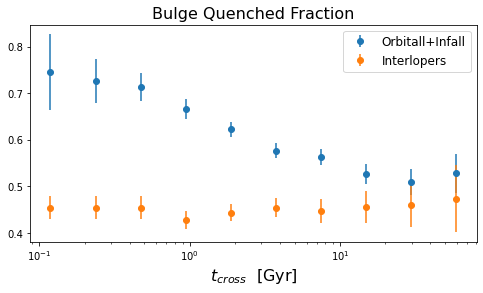

In [170]:
prop = 'bulge_quenching'
method = 'free_fall'
x = np.loadtxt(file_base.format(type=prop, prop=method)).T

plt.clf()
fig = plt.figure(figsize=(8,4))
plt.subplot(1, 1, 1)

count = np.zeros_like(x[0])
for i in range(1):
    ii = 2*i + 1
    plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Orbitall+Infall', fmt='o')

ii = 2*2+1
plt.errorbar(x[0], x[ii], yerr=x[ii+1], label='Interlopers', fmt='o')
# plt.errorbar(frac_n[0], frac_n[1], yerr=frac_n[2], label='Interlopers', fmt='o')
    #count = x[ii][0]
print('count:',x[1])
plt.xscale('log')
plt.legend(fontsize=12)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
plt.title('Bulge Quenched Fraction',fontsize=16)
plt.xlabel(r'$t_{cross}$  [Gyr]', fontsize=16)
# plt.subplot(1, 2, 2)

# y = np.empty((0))
# for i in range(3):
#     ii = (2*i + 1)+6
#     plt.errorbar(x[0], x[ii], yerr=0.5*x[ii+1], label=label2[i], fmt='o')
#     y = np.hstack([y,x[ii]])

# ymin,ymax = get_percentile(y)
# plt.legend(fontsize=12)
# plt.ylim(ymin,ymax)
#plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
# plt.title('%s Fraction Excess'%prop,fontsize=16)


count: [0.79206 0.7397  0.66798 0.60802 0.57034 0.54774 0.53464 0.51257 0.48878
 0.46039 0.43874 0.4485 ]


<Figure size 432x288 with 0 Axes>

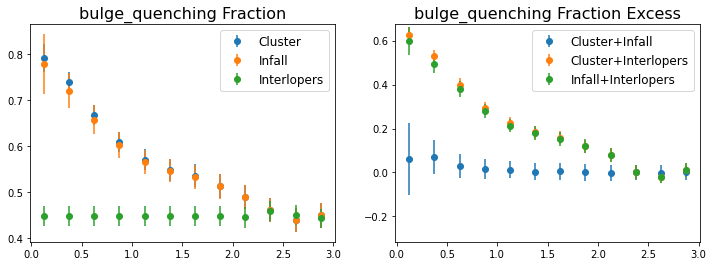

In [171]:
plot_fraction_pannel('radii','bulge_quenching')

count: [0.43329 0.43368 0.38582 0.35409 0.33697 0.31624 0.31018 0.28747 0.24986
 0.22468 0.22485 0.24052]


<Figure size 432x288 with 0 Axes>

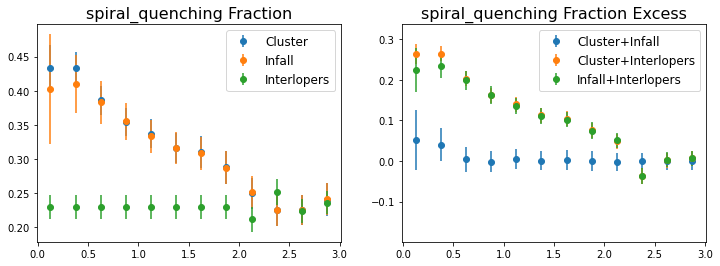

In [172]:
plot_fraction_pannel('radii','spiral_quenching')

In [146]:
cat = at.read('../data/groupCatalog_Yang_deCarvalho2017_frac.csv')

In [17]:
cat

Yang,RA,DEC,z,logM200,R200,N200,fo_quenching,fo_quenching_err,fi_quenching,fi_quenching_err,fn_quenching,fn_quenching_err,qf1_quenching,qf1_quenching_err,qf2_quenching,qf2_quenching_err,qf3_quenching,qf3_quenching_err,fo_sf,fo_sf_err,fi_sf,fi_sf_err,fn_sf,fn_sf_err,qf1_sf,qf1_sf_err,qf2_sf,qf2_sf_err,qf3_sf,qf3_sf_err,fo_elliptical,fo_elliptical_err,fi_elliptical,fi_elliptical_err,fn_elliptical,fn_elliptical_err,qf1_elliptical,qf1_elliptical_err,qf2_elliptical,qf2_elliptical_err,qf3_elliptical,qf3_elliptical_err,fo_spiral,fo_spiral_err,fi_spiral,fi_spiral_err,fn_spiral,fn_spiral_err,qf1_spiral,qf1_spiral_err,qf2_spiral,qf2_spiral_err,qf3_spiral,qf3_spiral_err,fo_s0,fo_s0_err,fi_s0,fi_s0_err,fn_s0,fn_s0_err,qf1_s0,qf1_s0_err,qf2_s0,qf2_s0_err,qf3_s0,qf3_s0_err,fo_bulge,fo_bulge_err,fi_bulge,fi_bulge_err,fn_bulge,fn_bulge_err,qf1_bulge,qf1_bulge_err,qf2_bulge,qf2_bulge_err,qf3_bulge,qf3_bulge_err,fo_disk,fo_disk_err,fi_disk,fi_disk_err,fn_disk,fn_disk_err,qf1_disk,qf1_disk_err,qf2_disk,qf2_disk_err,qf3_disk,qf3_disk_err,fo_bar,fo_bar_err,fi_bar,fi_bar_err,fn_bar,fn_bar_err,qf1_bar,qf1_bar_err,qf2_bar,qf2_bar_err,qf3_bar,qf3_bar_err,fo_merger,fo_merger_err,fi_merger,fi_merger_err,fn_merger,fn_merger_err,qf1_merger,qf1_merger_err,qf2_merger,qf2_merger_err,qf3_merger,qf3_merger_err,fo_lsf,fo_lsf_err,fi_lsf,fi_lsf_err,fn_lsf,fn_lsf_err,qf1_lsf,qf1_lsf_err,qf2_lsf,qf2_lsf_err,qf3_lsf,qf3_lsf_err,fo_liners,fo_liners_err,fi_liners,fi_liners_err,fn_liners,fn_liners_err,qf1_liners,qf1_liners_err,qf2_liners,qf2_liners_err,qf3_liners,qf3_liners_err,fo_agn,fo_agn_err,fi_agn,fi_agn_err,fn_agn,fn_agn_err,qf1_agn,qf1_agn_err,qf2_agn,qf2_agn_err,qf3_agn,qf3_agn_err,fo_compos,fo_compos_err,fi_compos,fi_compos_err,fn_compos,fn_compos_err,qf1_compos,qf1_compos_err,qf2_compos,qf2_compos_err,qf3_compos,qf3_compos_err,fo_unclas,fo_unclas_err,fi_unclas,fi_unclas_err,fn_unclas,fn_unclas_err,qf1_unclas,qf1_unclas_err,qf2_unclas,qf2_unclas_err,qf3_unclas,qf3_unclas_err
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,240.5602,16.1113,0.036,15.29,2.01,525,0.7813525935653314,0.13519589871509213,0.6556016597510373,0.0859259827638514,0.6527873207823737,0.07030035617250373,0.3651322295089742,0.4739705266534617,0.370278162285587,0.4452277073774285,0.008105519000646006,0.3197502647099222,0.21864740643466837,0.059152926331433035,0.34439834024896276,0.05612043987010179,0.34721267921762633,0.04628913354017485,-0.1918099686661073,0.12545156244622369,-0.19694817697879133,0.11590732584886866,-0.004311264755097488,0.11144165199406324,0.6543663821405121,0.1192316023109679,0.5326848513706551,0.0745226284995309,0.6105537996427101,0.0671139455657232

In [28]:
mytype='agn'

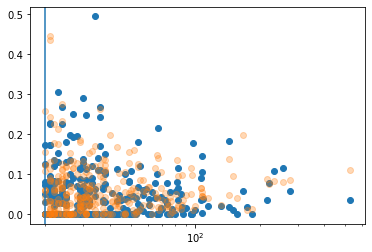

In [32]:
plt.scatter(cat['N200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
plt.axvline(20)
plt.xscale('log')

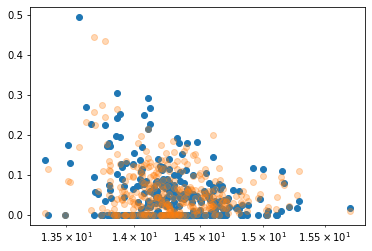

In [30]:
plt.scatter(cat['logM200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['logM200'],cat['fn_%s'%(mytype)],alpha=0.3)
plt.xscale('log')

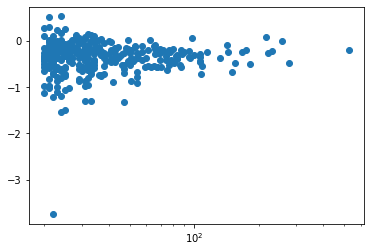

In [344]:
plt.scatter(cat['N200'],cat['qf2_%s'%(mytype)])
plt.xscale('log')

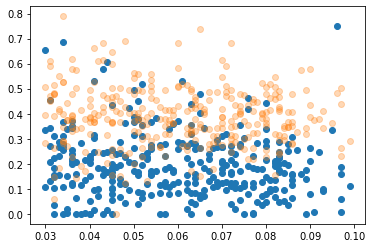

In [345]:
plt.scatter(cat['z'],cat['fo_%s'%(mytype)])
plt.scatter(cat['z'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

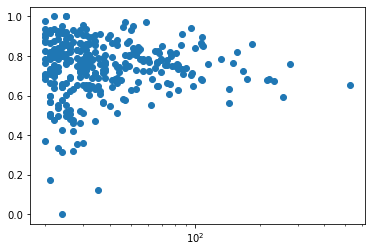

In [333]:
plt.scatter(cat['N200'],cat['fo_elliptical'])
plt.xscale('log')

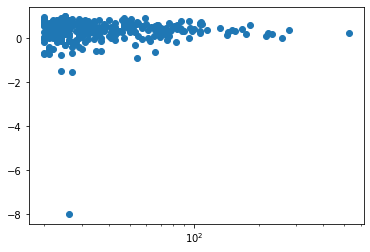

In [334]:
plt.scatter(cat['N200'],cat['qf1_elliptical'])
plt.xscale('log')

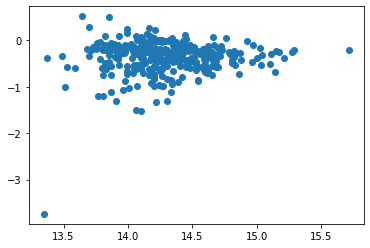

In [335]:
plt.scatter(cat['logM200'],cat['qf2_sf'])

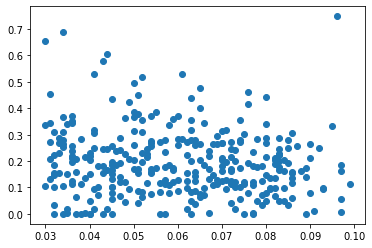

In [336]:
plt.scatter(cat['z'],cat['fo_sf'])

In [337]:
labels_mpr = ['quenching', 'sf', 'elliptical', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

In [338]:
mytype1='quenching'
mytype2='unclas'

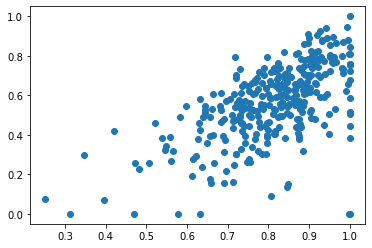

In [339]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [340]:
mytype1='elliptical'
mytype2='quenching'
mytype3='unclas'

(-0.02, 1.02)

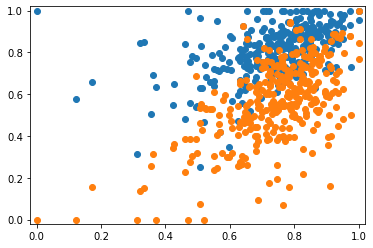

In [341]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype3)])
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')